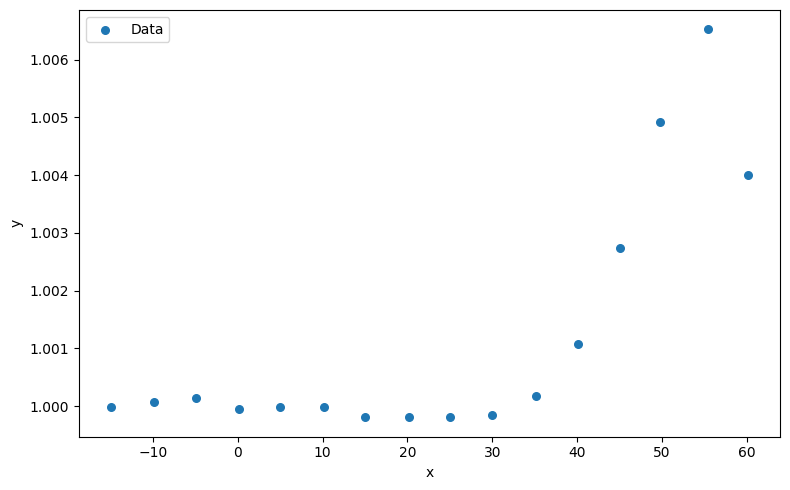

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load data
data = pd.read_csv("plot-data.csv", skipinitialspace=True)
x = data["x"].values
y = data["y"].values

# Sort x (required for splines)
idx = np.argsort(x)
x = x[idx]
y = y[idx]

# Fit a smoothing spline
# s=0 gives an interpolating spline (passes through points)
# increase s if you want smoothing
spline = UnivariateSpline(x, y, s=1e-7)

# Evaluate on a smooth grid
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = spline(x_fit)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=30, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




Polynomial coefficients (highest degree first):
[ 2.20775341e-10 -9.15260169e-10 -8.00399597e-08  2.85661768e-07
  6.60129059e-06 -2.39503800e-05  9.99947281e-01]

Multipole strengths at x = 0:
Dipole     (n=1): -2.395038e-05
Quadrupole (n=2): 1.320258e-05
Sextupole  (n=3): 1.713971e-06
Octupole   (n=4): -1.920959e-06
Decapole   (n=5): -1.098312e-07
Dodecapole (n=6): 1.589582e-07


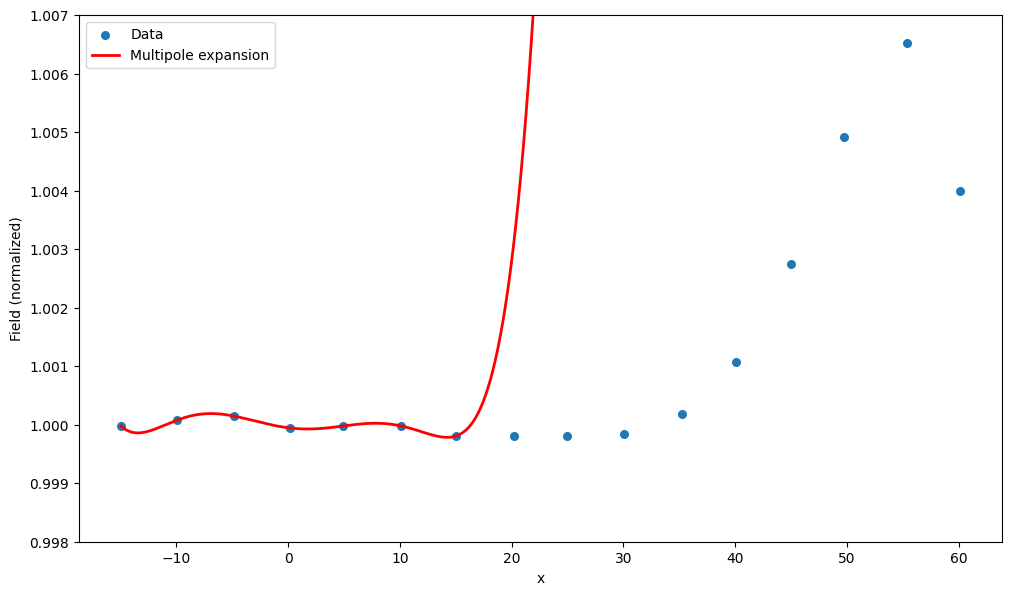

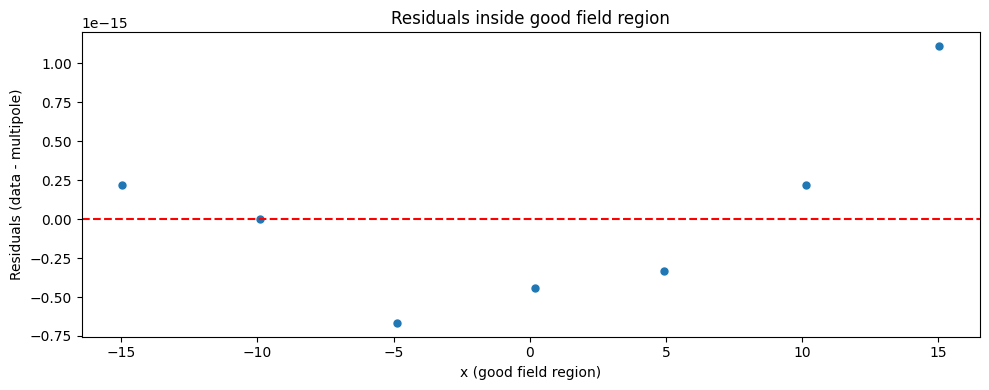

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# Load data
# ----------------------------------------
data = pd.read_csv("plot-data.csv", skipinitialspace=True)
x = data["x"].values
y = data["y"].values

# ----------------------------------------
# Choose good-field region and poly degree
# ----------------------------------------
good_field_limit = 20    # mm or whatever x-units you have
poly_degree = 6          # enough to extract multipoles up to n=6

mask = np.abs(x) < good_field_limit
x_fit = x[mask]
y_fit = y[mask]

# ----------------------------------------
# Polynomial fit inside the good field region
# ----------------------------------------
coeffs = np.polyfit(x_fit, y_fit, poly_degree)
poly = np.poly1d(coeffs)

print("\nPolynomial coefficients (highest degree first):")
print(coeffs)

# ----------------------------------------
# Extract multipole strengths
# ----------------------------------------
# poly(x) = a0 + a1*x + a2*x^2 + ...

a = coeffs[::-1]   # reorder low → high

k1 = a[1]
k2 = 2*a[2]
k3 = 6*a[3]
k4 = 24*a[4]
k5 = 120*a[5]
k6 = 720*a[6]

print("\nMultipole strengths at x = 0:")
print(f"Dipole     (n=1): {k1:e}")
print(f"Quadrupole (n=2): {k2:e}")
print(f"Sextupole  (n=3): {k3:e}")
print(f"Octupole   (n=4): {k4:e}")
print(f"Decapole   (n=5): {k5:e}")
print(f"Dodecapole (n=6): {k6:e}")

# ----------------------------------------
# Reconstruct field from multipole expansion
# ----------------------------------------
def multipole_series(x):
    return (a[0]
          + a[1]*x
          + a[2]*x**2
          + a[3]*x**3
          + a[4]*x**4
          + a[5]*x**5
          + a[6]*x**6)

x_smooth = np.linspace(min(x), max(x), 1000)
y_multipole = multipole_series(x_smooth)

# ----------------------------------------
# Compute residuals in GFR
# ----------------------------------------
residuals = y_fit - poly(x_fit)

# ----------------------------------------
# PLOTS
# ----------------------------------------

plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Data", s=30)
plt.plot(x_smooth, y_multipole, 'r-', linewidth=2, label="Multipole expansion")
plt.xlabel("x")
plt.ylabel("Field (normalized)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.ylim(0.998,1.007)
plt.show()

# --- Residual plot ---
plt.figure(figsize=(10,4))
plt.scatter(x_fit, residuals, s=25)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("x (good field region)")
plt.ylabel("Residuals (data - multipole)")
plt.title("Residuals inside good field region")
plt.grid()
plt.tight_layout()
plt.show()
